# Exercise 4

In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from math import sqrt
from numba import jit

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Noise deduction

In [2]:
# Load dataset

christ = cv2.imread('images/christ/christ.jpg', 0)
noise0 = cv2.imread('images/christ/noise0.jpg', 0)
noise1 = cv2.imread('images/christ/noise1.jpg', 0)
noise2 = cv2.imread('images/christ/noise2.jpg', 0)
noise3 = cv2.imread('images/christ/noise3.jpg', 0)
noise4 = cv2.imread('images/christ/noise4.jpg', 0)
noise5 = cv2.imread('images/christ/noise5.jpg', 0)
noise6 = cv2.imread('images/christ/noise6.jpg', 0)

### Original image

Text(0.5, -0.1, 'Hist')

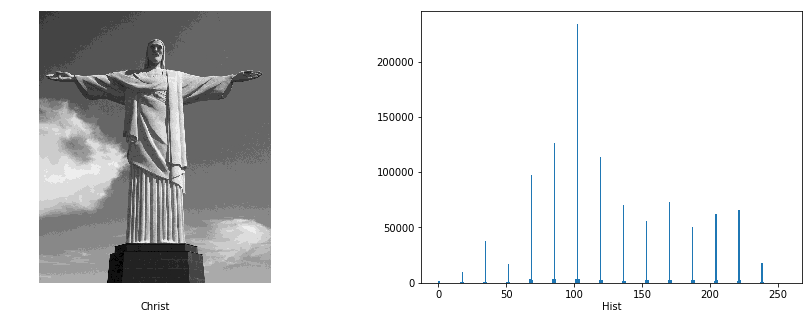

In [3]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(christ, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(christ.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Christ", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 0 - (Uniform)

Text(0.5, -0.1, 'Hist')

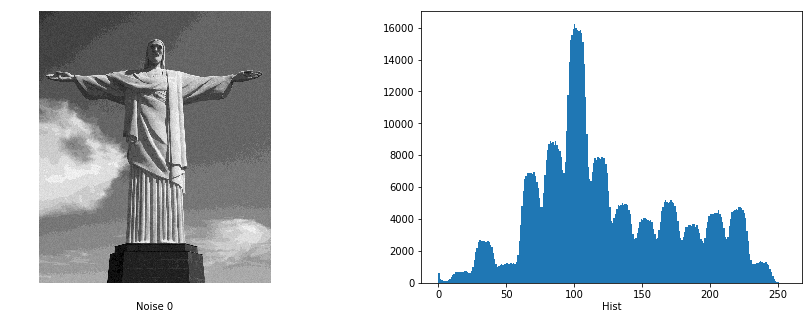

In [4]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise0, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise0.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 0", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 1 - (Salt and Pepper)

Text(0.5, -0.1, 'Hist')

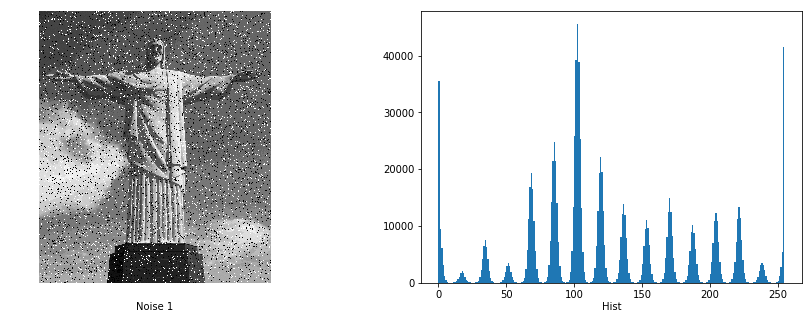

In [5]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise1, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise1.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 1", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 2 - (Rayleigh)

Text(0.5, -0.1, 'Hist')

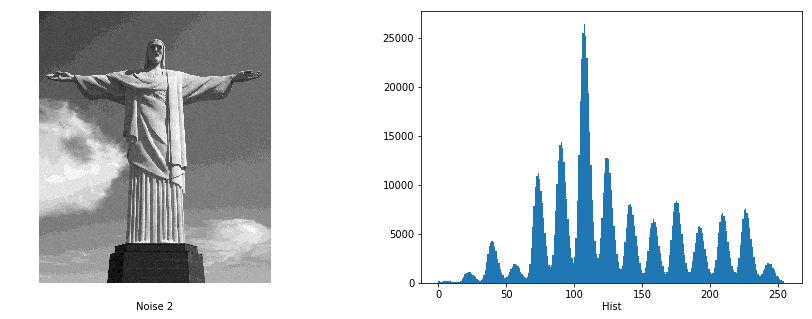

In [6]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise2, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise2.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 2", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 3 - (Salt)¶

Text(0.5, -0.1, 'Hist')

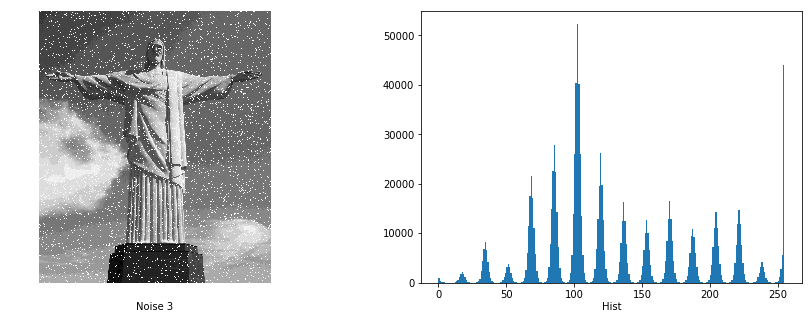

In [7]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise3, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise3.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 3", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 4 - (Salt and Pepper)¶

Text(0.5, -0.1, 'Hist')

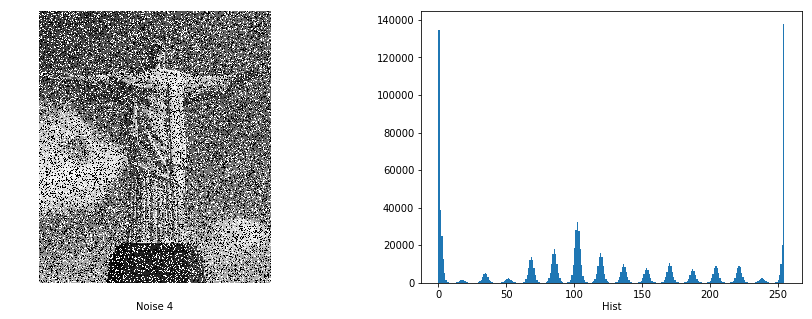

In [8]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise4, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise4.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 4", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 5 - (Pepper)¶

Text(0.5, -0.1, 'Hist')

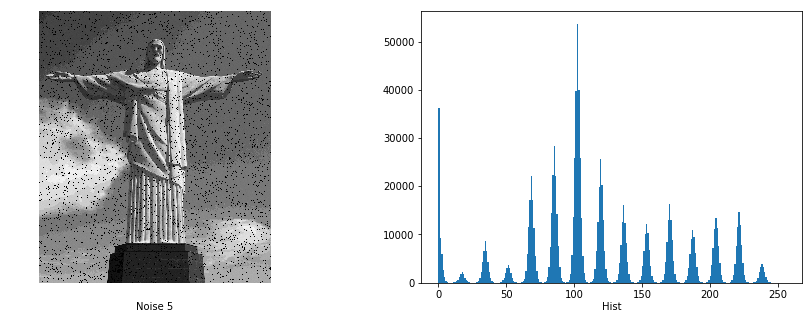

In [9]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise5, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise5.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 5", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 6 - (Gaussian)¶

Text(0.5, -0.1, 'Hist')

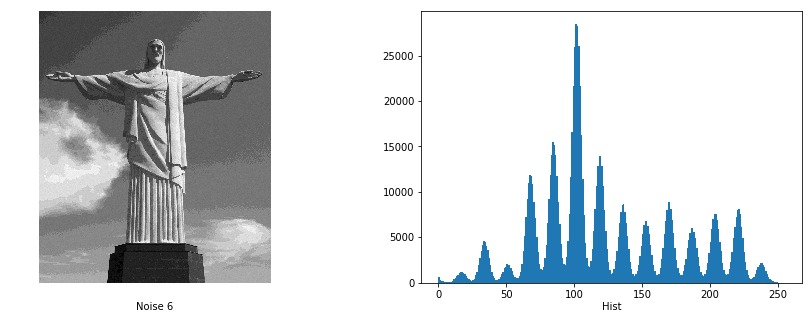

In [10]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise6, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise6.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 6", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

## Image correction

In [2]:
# Load dataset
ibirapuera = cv2.imread('images/ibirapuera/ibirapuera.jpg', 0)
ruidoGaussiano = cv2.imread('images/ibirapuera/ruidoGaussiano.jpg', 0)
ruidoGaussianoSalPimenta = cv2.imread('images/ibirapuera/ruidoGaussianoSalPimenta.jpg', 0)
ruidoPimenta = cv2.imread('images/ibirapuera/ruidoPimenta.jpg', 0)
ruidoSal = cv2.imread('images/ibirapuera/ruidoSal.jpg', 0)
ruidoSalPimenta = cv2.imread('images/ibirapuera/ruidoSalPimenta.jpg', 0)

### Filters implementation

In [22]:
@jit
def geometric(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
        
    for row in range(h):
        for col in range(w):
            result[row,col] = np.prod( border[row:row+rh,col:col+rw] ) ** ( 1 / (rw*rh) )
    
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def harmonic(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):
            numerator = kw*kh
            denominator = np.sum( 1 / border[row:row+rh,col:col+rw] )
            result[row,col] =  0 if denominator == 0 else numerator / denominator
        
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def contraharmonic(img, sizew, sizeh, order):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):
            numerator = np.sum( border[row:row+rh,col:col+rw] ** (order + 1) )
            denominator = np.sum( border[row:row+rh,col:col+rw] ** order )
            result[row,col] = 0 if denominator == 0 else numerator / denominator
            
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def max_filter(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):
            result[row,col] = border[row:row+rh,col:col+rw].max()
    
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def min_filter(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):
            result[row,col] = border[row:row+rh,col:col+rw].min()
    
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def mid_point(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):
            result[row,col] = (border[row:row+rh,col:col+rw].min() + border[row:row+rh,col:col+rw].max()) / 2
            
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def alpha_cut(img, sizew, sizeh, d):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT).astype('int')
    result = img.copy()
    
    for row in range(h):
        for col in range(w):            
            flatten = border[row:row+rh,col:col+rw].flatten()
            flatten.sort()            
            result[row,col] = 1 / ( kw*kh-d ) * np.sum( flatten[d//2:-(d//2)] )
    
    result = rescale_intensity(result, in_range=(0, 255))
    return result.astype('uint8')

@jit
def rmse(img1, img2):
    h,w = img1.shape
    result = img1.astype('float') - img2.astype('float')
    result = result ** 2
    
    summation = np.sum(result) / (w*h)
    return sqrt(summation)

### Gaussian noise

In [5]:
blur3 = cv2.blur(ruidoGaussiano, (3,3))
blur5 = cv2.blur(ruidoGaussiano, (5,5))
blur7 = cv2.blur(ruidoGaussiano, (7,7))
blur9 = cv2.blur(ruidoGaussiano, (9,9))

geometric3 = geometric(ruidoGaussiano, 3,3)
geometric5 = geometric(ruidoGaussiano, 5,5)
geometric7 = geometric(ruidoGaussiano, 7,7)
geometric9 = geometric(ruidoGaussiano, 9,9)

harmonic3 = harmonic(ruidoGaussiano, 3,3)
harmonic5 = harmonic(ruidoGaussiano, 5,5)
harmonic7 = harmonic(ruidoGaussiano, 7,7)
harmonic9 = harmonic(ruidoGaussiano, 9,9)

contraharmonic33 = contraharmonic(ruidoGaussiano, 3,3,3)
contraharmonic35 = contraharmonic(ruidoGaussiano, 3,3,5)
contraharmonic37 = contraharmonic(ruidoGaussiano, 3,3,7)
contraharmonic53 = contraharmonic(ruidoGaussiano, 5,5,3)
contraharmonic55 = contraharmonic(ruidoGaussiano, 5,5,5)
contraharmonic57 = contraharmonic(ruidoGaussiano, 5,5,7)
contraharmonic73 = contraharmonic(ruidoGaussiano, 7,7,3)
contraharmonic75 = contraharmonic(ruidoGaussiano, 7,7,5)
contraharmonic77 = contraharmonic(ruidoGaussiano, 7,7,7)
contraharmonic93 = contraharmonic(ruidoGaussiano, 9,9,3)
contraharmonic95 = contraharmonic(ruidoGaussiano, 9,9,5)
contraharmonic97 = contraharmonic(ruidoGaussiano, 9,9,7)

median3 = cv2.medianBlur(ruidoGaussiano, 3)
median5 = cv2.medianBlur(ruidoGaussiano, 5)
median7 = cv2.medianBlur(ruidoGaussiano, 7)
median9 = cv2.medianBlur(ruidoGaussiano, 9)

max3 = max_filter(ruidoGaussiano, 3,3)
max5 = max_filter(ruidoGaussiano, 5,5)
max7 = max_filter(ruidoGaussiano, 7,7)
max9 = max_filter(ruidoGaussiano, 9,9)

min3 = min_filter(ruidoGaussiano, 3,3)
min5 = min_filter(ruidoGaussiano, 5,5)
min7 = min_filter(ruidoGaussiano, 7,7)
min9 = min_filter(ruidoGaussiano, 9,9)

mid_point3 = mid_point(ruidoGaussiano, 3,3)
mid_point5 = mid_point(ruidoGaussiano, 5,5)
mid_point7 = mid_point(ruidoGaussiano, 7,7)
mid_point9 = mid_point(ruidoGaussiano, 9,9)

alpha_cut31 = alpha_cut(ruidoGaussiano, 3,3,1)
alpha_cut32 = alpha_cut(ruidoGaussiano, 3,3,2)
alpha_cut33 = alpha_cut(ruidoGaussiano, 3,3,3)
alpha_cut51 = alpha_cut(ruidoGaussiano, 5,5,1)
alpha_cut52 = alpha_cut(ruidoGaussiano, 5,5,2)
alpha_cut53 = alpha_cut(ruidoGaussiano, 5,5,3)
alpha_cut71 = alpha_cut(ruidoGaussiano, 7,7,1)
alpha_cut72 = alpha_cut(ruidoGaussiano, 7,7,2)
alpha_cut73 = alpha_cut(ruidoGaussiano, 7,7,3)
alpha_cut91 = alpha_cut(ruidoGaussiano, 9,9,1)
alpha_cut92 = alpha_cut(ruidoGaussiano, 9,9,2)
alpha_cut93 = alpha_cut(ruidoGaussiano, 9,9,3)

In [7]:
print("blur3:", rmse(blur3, ibirapuera))
print("blur5:", rmse(blur5, ibirapuera))
print("blur7:", rmse(blur7, ibirapuera))
print("blur9:", rmse(blur9, ibirapuera))
print("geometric3:", rmse(geometric3, ibirapuera))
print("geometric5:", rmse(geometric5, ibirapuera))
print("geometric7:", rmse(geometric7, ibirapuera))
print("geometric9:", rmse(geometric9, ibirapuera))
print("harmonic3:", rmse(harmonic3, ibirapuera))
print("harmonic5:", rmse(harmonic5, ibirapuera))
print("harmonic7:", rmse(harmonic7, ibirapuera))
print("harmonic9:", rmse(harmonic9, ibirapuera))
print("contraharmonic33:", rmse(contraharmonic33, ibirapuera))
print("contraharmonic35:", rmse(contraharmonic35, ibirapuera))
print("contraharmonic37:", rmse(contraharmonic37, ibirapuera))
print("contraharmonic53:", rmse(contraharmonic53, ibirapuera))
print("contraharmonic55:", rmse(contraharmonic55, ibirapuera))
print("contraharmonic57:", rmse(contraharmonic57, ibirapuera))
print("contraharmonic73:", rmse(contraharmonic73, ibirapuera))
print("contraharmonic75:", rmse(contraharmonic75, ibirapuera))
print("contraharmonic77:", rmse(contraharmonic77, ibirapuera))
print("contraharmonic93:", rmse(contraharmonic93, ibirapuera))
print("contraharmonic95:", rmse(contraharmonic95, ibirapuera))
print("contraharmonic97:", rmse(contraharmonic97, ibirapuera))
print("median3:", rmse(median3, ibirapuera))
print("median5:", rmse(median5, ibirapuera))
print("median7:", rmse(median7, ibirapuera))
print("median9:", rmse(median9, ibirapuera))
print("max3:", rmse(max3, ibirapuera))
print("max5:", rmse(max5, ibirapuera))
print("max7:", rmse(max7, ibirapuera))
print("max9:", rmse(max9, ibirapuera))
print("min3:", rmse(min3, ibirapuera))
print("min5:", rmse(min5, ibirapuera))
print("min7:", rmse(min7, ibirapuera))
print("min9:", rmse(min9, ibirapuera))
print("mid_point3:", rmse(mid_point3, ibirapuera))
print("mid_point5:", rmse(mid_point5, ibirapuera))
print("mid_point7:", rmse(mid_point7, ibirapuera))
print("mid_point9:", rmse(mid_point9, ibirapuera))
print("alpha_cut31:", rmse(alpha_cut31, ibirapuera))
print("alpha_cut32:", rmse(alpha_cut32, ibirapuera))
print("alpha_cut33:", rmse(alpha_cut33, ibirapuera))
print("alpha_cut51:", rmse(alpha_cut51, ibirapuera))
print("alpha_cut52:", rmse(alpha_cut52, ibirapuera))
print("alpha_cut53:", rmse(alpha_cut53, ibirapuera))
print("alpha_cut71:", rmse(alpha_cut71, ibirapuera))
print("alpha_cut72:", rmse(alpha_cut72, ibirapuera))
print("alpha_cut73:", rmse(alpha_cut73, ibirapuera))
print("alpha_cut91:", rmse(alpha_cut91, ibirapuera))
print("alpha_cut92:", rmse(alpha_cut92, ibirapuera))
print("alpha_cut93:", rmse(alpha_cut93, ibirapuera))

blur3: 15.29242310093623
blur5: 19.446575688916923
blur7: 21.365760970196817
blur9: 22.7748214590695
geometric3: 28.532664005644637
geometric5: 28.481469077271093
geometric7: 96.74169643979167
geometric9: 134.42824203620475
harmonic3: 92.60466489696634
harmonic5: 106.08098795955488
harmonic7: 87.49223741575172
harmonic9: 106.73822137636587
contraharmonic33: 28.532664005644637
contraharmonic35: 28.532664005644637
contraharmonic37: 29.313860083892365
contraharmonic53: 29.469573774228305
contraharmonic55: 30.709273145311716
contraharmonic57: 56.73530223343769
contraharmonic73: 31.439460808766203
contraharmonic75: 33.909778094144826
contraharmonic77: 64.9673247089823
contraharmonic93: 33.38641894779459
contraharmonic95: 36.82465725494868
contraharmonic97: 78.13580428294183
median3: 15.046018779684498
median5: 18.996987003277724
median7: 20.898356017950384
median9: 22.3273643823619
max3: 28.532664005644637
max5: 34.152350741730594
max7: 41.13749088650993
max9: 47.19341487400514
min3: 28.532

### Best result (Median filter 3x3)

Text(0.5, -0.1, 'Median filter 3x3')

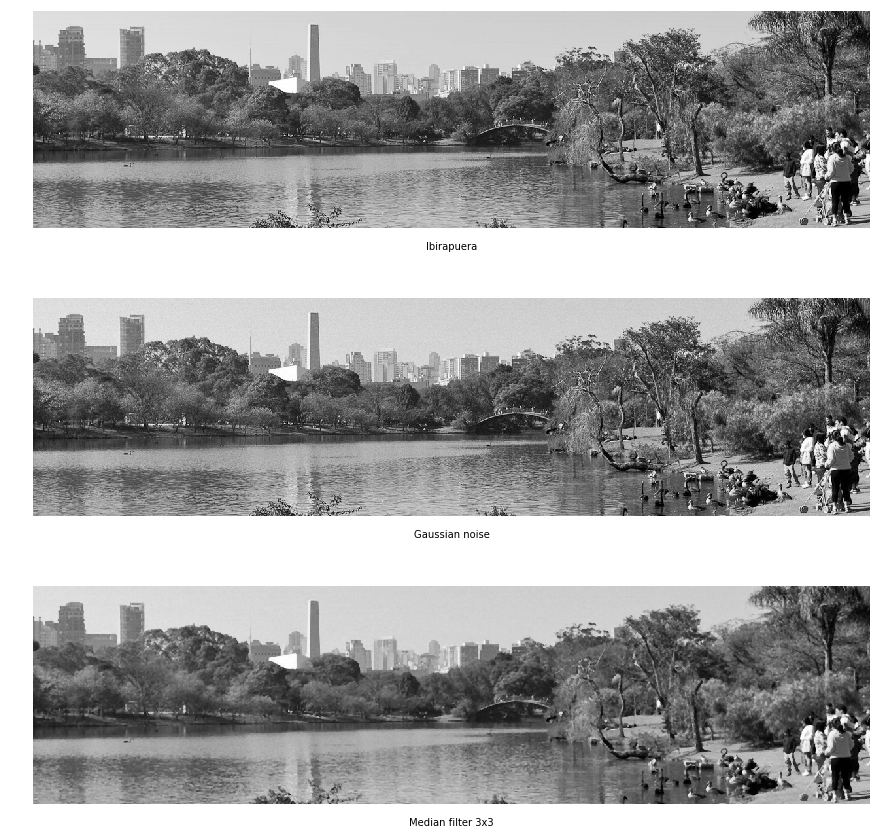

In [8]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
ax1.imshow(ibirapuera, cmap='gray')
ax2 = plt.subplot(312)
ax2.imshow(ruidoGaussiano, cmap='gray')
ax3 = plt.subplot(313)
ax3.imshow(median3, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Gaussian noise", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Median filter 3x3", ha="center", transform=ax3.transAxes)

### Gaussian noise with salt and pepper noise

In [9]:
blur3 = cv2.blur(ruidoGaussianoSalPimenta, (3,3))
blur5 = cv2.blur(ruidoGaussianoSalPimenta, (5,5))
blur7 = cv2.blur(ruidoGaussianoSalPimenta, (7,7))
blur9 = cv2.blur(ruidoGaussianoSalPimenta, (9,9))

geometric3 = geometric(ruidoGaussianoSalPimenta, 3,3)
geometric5 = geometric(ruidoGaussianoSalPimenta, 5,5)
geometric7 = geometric(ruidoGaussianoSalPimenta, 7,7)
geometric9 = geometric(ruidoGaussianoSalPimenta, 9,9)

harmonic3 = harmonic(ruidoGaussianoSalPimenta, 3,3)
harmonic5 = harmonic(ruidoGaussianoSalPimenta, 5,5)
harmonic7 = harmonic(ruidoGaussianoSalPimenta, 7,7)
harmonic9 = harmonic(ruidoGaussianoSalPimenta, 9,9)

contraharmonic33 = contraharmonic(ruidoGaussianoSalPimenta, 3,3,3)
contraharmonic35 = contraharmonic(ruidoGaussianoSalPimenta, 3,3,5)
contraharmonic37 = contraharmonic(ruidoGaussianoSalPimenta, 3,3,7)
contraharmonic53 = contraharmonic(ruidoGaussianoSalPimenta, 5,5,3)
contraharmonic55 = contraharmonic(ruidoGaussianoSalPimenta, 5,5,5)
contraharmonic57 = contraharmonic(ruidoGaussianoSalPimenta, 5,5,7)
contraharmonic73 = contraharmonic(ruidoGaussianoSalPimenta, 7,7,3)
contraharmonic75 = contraharmonic(ruidoGaussianoSalPimenta, 7,7,5)
contraharmonic77 = contraharmonic(ruidoGaussianoSalPimenta, 7,7,7)
contraharmonic93 = contraharmonic(ruidoGaussianoSalPimenta, 9,9,3)
contraharmonic95 = contraharmonic(ruidoGaussianoSalPimenta, 9,9,5)
contraharmonic97 = contraharmonic(ruidoGaussianoSalPimenta, 9,9,7)

median3 = cv2.medianBlur(ruidoGaussianoSalPimenta, 3)
median5 = cv2.medianBlur(ruidoGaussianoSalPimenta, 5)
median7 = cv2.medianBlur(ruidoGaussianoSalPimenta, 7)
median9 = cv2.medianBlur(ruidoGaussianoSalPimenta, 9)

max3 = max_filter(ruidoGaussianoSalPimenta, 3,3)
max5 = max_filter(ruidoGaussianoSalPimenta, 5,5)
max7 = max_filter(ruidoGaussianoSalPimenta, 7,7)
max9 = max_filter(ruidoGaussianoSalPimenta, 9,9)

min3 = min_filter(ruidoGaussianoSalPimenta, 3,3)
min5 = min_filter(ruidoGaussianoSalPimenta, 5,5)
min7 = min_filter(ruidoGaussianoSalPimenta, 7,7)
min9 = min_filter(ruidoGaussianoSalPimenta, 9,9)

mid_point3 = mid_point(ruidoGaussianoSalPimenta, 3,3)
mid_point5 = mid_point(ruidoGaussianoSalPimenta, 5,5)
mid_point7 = mid_point(ruidoGaussianoSalPimenta, 7,7)
mid_point9 = mid_point(ruidoGaussianoSalPimenta, 9,9)

alpha_cut31 = alpha_cut(ruidoGaussianoSalPimenta, 3,3,1)
alpha_cut32 = alpha_cut(ruidoGaussianoSalPimenta, 3,3,2)
alpha_cut33 = alpha_cut(ruidoGaussianoSalPimenta, 3,3,3)
alpha_cut51 = alpha_cut(ruidoGaussianoSalPimenta, 5,5,1)
alpha_cut52 = alpha_cut(ruidoGaussianoSalPimenta, 5,5,2)
alpha_cut53 = alpha_cut(ruidoGaussianoSalPimenta, 5,5,3)
alpha_cut71 = alpha_cut(ruidoGaussianoSalPimenta, 7,7,1)
alpha_cut72 = alpha_cut(ruidoGaussianoSalPimenta, 7,7,2)
alpha_cut73 = alpha_cut(ruidoGaussianoSalPimenta, 7,7,3)
alpha_cut91 = alpha_cut(ruidoGaussianoSalPimenta, 9,9,1)
alpha_cut92 = alpha_cut(ruidoGaussianoSalPimenta, 9,9,2)
alpha_cut93 = alpha_cut(ruidoGaussianoSalPimenta, 9,9,3)

In [10]:
print("blur3:", rmse(blur3, ibirapuera))
print("blur5:", rmse(blur5, ibirapuera))
print("blur7:", rmse(blur7, ibirapuera))
print("blur9:", rmse(blur9, ibirapuera))
print("geometric3:", rmse(geometric3, ibirapuera))
print("geometric5:", rmse(geometric5, ibirapuera))
print("geometric7:", rmse(geometric7, ibirapuera))
print("geometric9:", rmse(geometric9, ibirapuera))
print("harmonic3:", rmse(harmonic3, ibirapuera))
print("harmonic5:", rmse(harmonic5, ibirapuera))
print("harmonic7:", rmse(harmonic7, ibirapuera))
print("harmonic9:", rmse(harmonic9, ibirapuera))
print("contraharmonic33:", rmse(contraharmonic33, ibirapuera))
print("contraharmonic35:", rmse(contraharmonic35, ibirapuera))
print("contraharmonic37:", rmse(contraharmonic37, ibirapuera))
print("contraharmonic53:", rmse(contraharmonic53, ibirapuera))
print("contraharmonic55:", rmse(contraharmonic55, ibirapuera))
print("contraharmonic57:", rmse(contraharmonic57, ibirapuera))
print("contraharmonic73:", rmse(contraharmonic73, ibirapuera))
print("contraharmonic75:", rmse(contraharmonic75, ibirapuera))
print("contraharmonic77:", rmse(contraharmonic77, ibirapuera))
print("contraharmonic93:", rmse(contraharmonic93, ibirapuera))
print("contraharmonic95:", rmse(contraharmonic95, ibirapuera))
print("contraharmonic97:", rmse(contraharmonic97, ibirapuera))
print("median3:", rmse(median3, ibirapuera))
print("median5:", rmse(median5, ibirapuera))
print("median7:", rmse(median7, ibirapuera))
print("median9:", rmse(median9, ibirapuera))
print("max3:", rmse(max3, ibirapuera))
print("max5:", rmse(max5, ibirapuera))
print("max7:", rmse(max7, ibirapuera))
print("max9:", rmse(max9, ibirapuera))
print("min3:", rmse(min3, ibirapuera))
print("min5:", rmse(min5, ibirapuera))
print("min7:", rmse(min7, ibirapuera))
print("min9:", rmse(min9, ibirapuera))
print("mid_point3:", rmse(mid_point3, ibirapuera))
print("mid_point5:", rmse(mid_point5, ibirapuera))
print("mid_point7:", rmse(mid_point7, ibirapuera))
print("mid_point9:", rmse(mid_point9, ibirapuera))
print("alpha_cut31:", rmse(alpha_cut31, ibirapuera))
print("alpha_cut32:", rmse(alpha_cut32, ibirapuera))
print("alpha_cut33:", rmse(alpha_cut33, ibirapuera))
print("alpha_cut51:", rmse(alpha_cut51, ibirapuera))
print("alpha_cut52:", rmse(alpha_cut52, ibirapuera))
print("alpha_cut53:", rmse(alpha_cut53, ibirapuera))
print("alpha_cut71:", rmse(alpha_cut71, ibirapuera))
print("alpha_cut72:", rmse(alpha_cut72, ibirapuera))
print("alpha_cut73:", rmse(alpha_cut73, ibirapuera))
print("alpha_cut91:", rmse(alpha_cut91, ibirapuera))
print("alpha_cut92:", rmse(alpha_cut92, ibirapuera))
print("alpha_cut93:", rmse(alpha_cut93, ibirapuera))

blur3: 27.804378727912535
blur5: 25.626948536111794
blur7: 25.772725556319248
blur9: 26.411719152605272
geometric3: 66.21938701461674
geometric5: 79.95860673680659
geometric7: 116.96051962037711
geometric9: 138.44529492896902
harmonic3: 101.36548522256926
harmonic5: 112.2190800470852
harmonic7: 113.83934996275977
harmonic9: 125.74954667558096
contraharmonic33: 66.21938701461674
contraharmonic35: 66.21938701461674
contraharmonic37: 64.57162539183324
contraharmonic53: 73.68006704940899
contraharmonic55: 78.94975833835994
contraharmonic57: 92.57517853121503
contraharmonic73: 87.971436683219
contraharmonic75: 100.02868647054841
contraharmonic77: 120.64932679202096
contraharmonic93: 95.22225255310619
contraharmonic95: 112.54006404144238
contraharmonic97: 134.01898604837277
median3: 17.89982388464622
median5: 19.694530240561626
median7: 21.283457916734147
median9: 22.612326909581103
max3: 66.21938701461674
max5: 82.99334678427063
max7: 108.87085682859114
max9: 125.37352702660795
min3: 66.219

### Best result (Median filter 3x3)

Text(0.5, -0.1, 'Median filter 3x3')

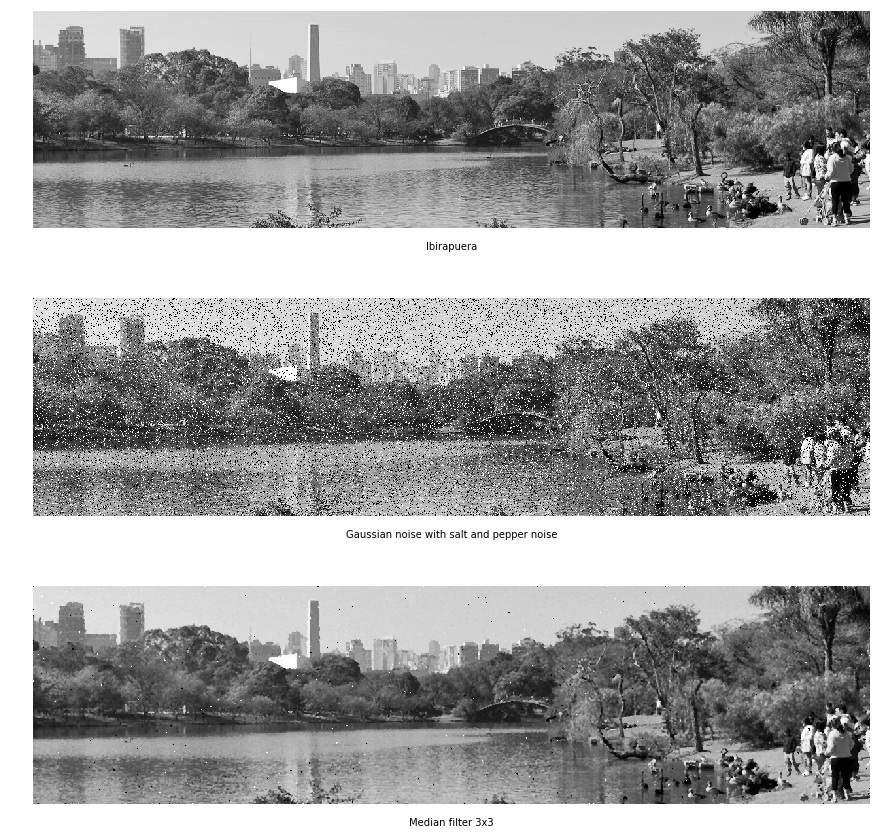

In [11]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
ax1.imshow(ibirapuera, cmap='gray')
ax2 = plt.subplot(312)
ax2.imshow(ruidoGaussianoSalPimenta, cmap='gray')
ax3 = plt.subplot(313)
ax3.imshow(median3, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Gaussian noise with salt and pepper noise", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Median filter 3x3", ha="center", transform=ax3.transAxes)

### Pepper noise

In [12]:
blur3 = cv2.blur(ruidoPimenta, (3,3))
blur5 = cv2.blur(ruidoPimenta, (5,5))
blur7 = cv2.blur(ruidoPimenta, (7,7))
blur9 = cv2.blur(ruidoPimenta, (9,9))

geometric3 = geometric(ruidoPimenta, 3,3)
geometric5 = geometric(ruidoPimenta, 5,5)
geometric7 = geometric(ruidoPimenta, 7,7)
geometric9 = geometric(ruidoPimenta, 9,9)

harmonic3 = harmonic(ruidoPimenta, 3,3)
harmonic5 = harmonic(ruidoPimenta, 5,5)
harmonic7 = harmonic(ruidoPimenta, 7,7)
harmonic9 = harmonic(ruidoPimenta, 9,9)

contraharmonic33 = contraharmonic(ruidoPimenta, 3,3,3)
contraharmonic35 = contraharmonic(ruidoPimenta, 3,3,5)
contraharmonic37 = contraharmonic(ruidoPimenta, 3,3,7)
contraharmonic53 = contraharmonic(ruidoPimenta, 5,5,3)
contraharmonic55 = contraharmonic(ruidoPimenta, 5,5,5)
contraharmonic57 = contraharmonic(ruidoPimenta, 5,5,7)
contraharmonic73 = contraharmonic(ruidoPimenta, 7,7,3)
contraharmonic75 = contraharmonic(ruidoPimenta, 7,7,5)
contraharmonic77 = contraharmonic(ruidoPimenta, 7,7,7)
contraharmonic93 = contraharmonic(ruidoPimenta, 9,9,3)
contraharmonic95 = contraharmonic(ruidoPimenta, 9,9,5)
contraharmonic97 = contraharmonic(ruidoPimenta, 9,9,7)

median3 = cv2.medianBlur(ruidoPimenta, 3)
median5 = cv2.medianBlur(ruidoPimenta, 5)
median7 = cv2.medianBlur(ruidoPimenta, 7)
median9 = cv2.medianBlur(ruidoPimenta, 9)

max3 = max_filter(ruidoPimenta, 3,3)
max5 = max_filter(ruidoPimenta, 5,5)
max7 = max_filter(ruidoPimenta, 7,7)
max9 = max_filter(ruidoPimenta, 9,9)

min3 = min_filter(ruidoPimenta, 3,3)
min5 = min_filter(ruidoPimenta, 5,5)
min7 = min_filter(ruidoPimenta, 7,7)
min9 = min_filter(ruidoPimenta, 9,9)

mid_point3 = mid_point(ruidoPimenta, 3,3)
mid_point5 = mid_point(ruidoPimenta, 5,5)
mid_point7 = mid_point(ruidoPimenta, 7,7)
mid_point9 = mid_point(ruidoPimenta, 9,9)

alpha_cut31 = alpha_cut(ruidoPimenta, 3,3,1)
alpha_cut32 = alpha_cut(ruidoPimenta, 3,3,2)
alpha_cut33 = alpha_cut(ruidoPimenta, 3,3,3)
alpha_cut51 = alpha_cut(ruidoPimenta, 5,5,1)
alpha_cut52 = alpha_cut(ruidoPimenta, 5,5,2)
alpha_cut53 = alpha_cut(ruidoPimenta, 5,5,3)
alpha_cut71 = alpha_cut(ruidoPimenta, 7,7,1)
alpha_cut72 = alpha_cut(ruidoPimenta, 7,7,2)
alpha_cut73 = alpha_cut(ruidoPimenta, 7,7,3)
alpha_cut91 = alpha_cut(ruidoPimenta, 9,9,1)
alpha_cut92 = alpha_cut(ruidoPimenta, 9,9,2)
alpha_cut93 = alpha_cut(ruidoPimenta, 9,9,3)

In [13]:
print("blur3:", rmse(blur3, ibirapuera))
print("blur5:", rmse(blur5, ibirapuera))
print("blur7:", rmse(blur7, ibirapuera))
print("blur9:", rmse(blur9, ibirapuera))
print("geometric3:", rmse(geometric3, ibirapuera))
print("geometric5:", rmse(geometric5, ibirapuera))
print("geometric7:", rmse(geometric7, ibirapuera))
print("geometric9:", rmse(geometric9, ibirapuera))
print("harmonic3:", rmse(harmonic3, ibirapuera))
print("harmonic5:", rmse(harmonic5, ibirapuera))
print("harmonic7:", rmse(harmonic7, ibirapuera))
print("harmonic9:", rmse(harmonic9, ibirapuera))
print("contraharmonic33:", rmse(contraharmonic33, ibirapuera))
print("contraharmonic35:", rmse(contraharmonic35, ibirapuera))
print("contraharmonic37:", rmse(contraharmonic37, ibirapuera))
print("contraharmonic53:", rmse(contraharmonic53, ibirapuera))
print("contraharmonic55:", rmse(contraharmonic55, ibirapuera))
print("contraharmonic57:", rmse(contraharmonic57, ibirapuera))
print("contraharmonic73:", rmse(contraharmonic73, ibirapuera))
print("contraharmonic75:", rmse(contraharmonic75, ibirapuera))
print("contraharmonic77:", rmse(contraharmonic77, ibirapuera))
print("contraharmonic93:", rmse(contraharmonic93, ibirapuera))
print("contraharmonic95:", rmse(contraharmonic95, ibirapuera))
print("contraharmonic97:", rmse(contraharmonic97, ibirapuera))
print("median3:", rmse(median3, ibirapuera))
print("median5:", rmse(median5, ibirapuera))
print("median7:", rmse(median7, ibirapuera))
print("median9:", rmse(median9, ibirapuera))
print("max3:", rmse(max3, ibirapuera))
print("max5:", rmse(max5, ibirapuera))
print("max7:", rmse(max7, ibirapuera))
print("max9:", rmse(max9, ibirapuera))
print("min3:", rmse(min3, ibirapuera))
print("min5:", rmse(min5, ibirapuera))
print("min7:", rmse(min7, ibirapuera))
print("min9:", rmse(min9, ibirapuera))
print("mid_point3:", rmse(mid_point3, ibirapuera))
print("mid_point5:", rmse(mid_point5, ibirapuera))
print("mid_point7:", rmse(mid_point7, ibirapuera))
print("mid_point9:", rmse(mid_point9, ibirapuera))
print("alpha_cut31:", rmse(alpha_cut31, ibirapuera))
print("alpha_cut32:", rmse(alpha_cut32, ibirapuera))
print("alpha_cut33:", rmse(alpha_cut33, ibirapuera))
print("alpha_cut51:", rmse(alpha_cut51, ibirapuera))
print("alpha_cut52:", rmse(alpha_cut52, ibirapuera))
print("alpha_cut53:", rmse(alpha_cut53, ibirapuera))
print("alpha_cut71:", rmse(alpha_cut71, ibirapuera))
print("alpha_cut72:", rmse(alpha_cut72, ibirapuera))
print("alpha_cut73:", rmse(alpha_cut73, ibirapuera))
print("alpha_cut91:", rmse(alpha_cut91, ibirapuera))
print("alpha_cut92:", rmse(alpha_cut92, ibirapuera))
print("alpha_cut93:", rmse(alpha_cut93, ibirapuera))

blur3: 49.4913342791567
blur5: 47.81914417318346
blur7: 47.74256150986532
blur9: 47.999203053866495
geometric3: 80.14510149437422
geometric5: 116.1298247663483
geometric7: 134.36352753246868
geometric9: 140.3260949693092
harmonic3: 106.53510791415562
harmonic5: 127.40838958254385
harmonic7: 134.69688038236444
harmonic9: 139.27792871580502
contraharmonic33: 80.14510149437422
contraharmonic35: 80.14510149437422
contraharmonic37: 80.34369117145917
contraharmonic53: 32.41576148311235
contraharmonic55: 33.198891288551174
contraharmonic57: 50.21265434099723
contraharmonic73: 31.554822714190994
contraharmonic75: 33.61975877914456
contraharmonic77: 67.59649674005139
contraharmonic93: 33.42060457633506
contraharmonic95: 36.48775855671657
contraharmonic97: 74.04451271038772
median3: 48.22822635434602
median5: 31.94858461550267
median7: 28.410258088226506
median9: 29.03502681246826
max3: 80.14510149437422
max5: 35.239377672409866
max7: 39.173889051601414
max9: 45.03204903318999
min3: 80.145101494

### Best result (Median Filter 7x7)

Text(0.5, -0.1, 'Median filter 7x7')

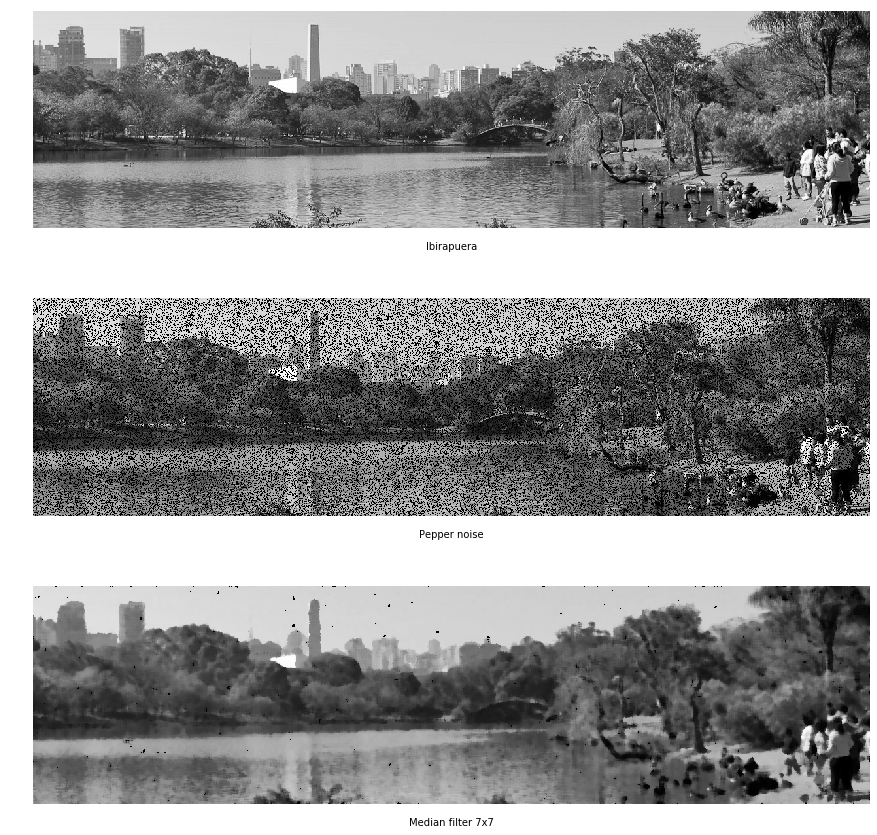

In [15]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
ax1.imshow(ibirapuera, cmap='gray')
ax2 = plt.subplot(312)
ax2.imshow(ruidoPimenta, cmap='gray')
ax3 = plt.subplot(313)
ax3.imshow(median7, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Pepper noise", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Median filter 7x7", ha="center", transform=ax3.transAxes)

### Salt noise

In [23]:
blur3 = cv2.blur(ruidoSal, (3,3))
blur5 = cv2.blur(ruidoSal, (5,5))
blur7 = cv2.blur(ruidoSal, (7,7))
blur9 = cv2.blur(ruidoSal, (9,9))

geometric3 = geometric(ruidoSal, 3,3)
geometric5 = geometric(ruidoSal, 5,5)
geometric7 = geometric(ruidoSal, 7,7)
geometric9 = geometric(ruidoSal, 9,9)

harmonic3 = harmonic(ruidoSal, 3,3)
harmonic5 = harmonic(ruidoSal, 5,5)
harmonic7 = harmonic(ruidoSal, 7,7)
harmonic9 = harmonic(ruidoSal, 9,9)

contraharmonic33 = contraharmonic(ruidoSal, 3,3,3)
contraharmonic35 = contraharmonic(ruidoSal, 3,3,5)
contraharmonic37 = contraharmonic(ruidoSal, 3,3,7)
contraharmonic53 = contraharmonic(ruidoSal, 5,5,3)
contraharmonic55 = contraharmonic(ruidoSal, 5,5,5)
contraharmonic57 = contraharmonic(ruidoSal, 5,5,7)
contraharmonic73 = contraharmonic(ruidoSal, 7,7,3)
contraharmonic75 = contraharmonic(ruidoSal, 7,7,5)
contraharmonic77 = contraharmonic(ruidoSal, 7,7,7)
contraharmonic93 = contraharmonic(ruidoSal, 9,9,3)
contraharmonic95 = contraharmonic(ruidoSal, 9,9,5)
contraharmonic97 = contraharmonic(ruidoSal, 9,9,7)

median3 = cv2.medianBlur(ruidoSal, 3)
median5 = cv2.medianBlur(ruidoSal, 5)
median7 = cv2.medianBlur(ruidoSal, 7)
median9 = cv2.medianBlur(ruidoSal, 9)

max3 = max_filter(ruidoSal, 3,3)
max5 = max_filter(ruidoSal, 5,5)
max7 = max_filter(ruidoSal, 7,7)
max9 = max_filter(ruidoSal, 9,9)

min3 = min_filter(ruidoSal, 3,3)
min5 = min_filter(ruidoSal, 5,5)
min7 = min_filter(ruidoSal, 7,7)
min9 = min_filter(ruidoSal, 9,9)

mid_point3 = mid_point(ruidoSal, 3,3)
mid_point5 = mid_point(ruidoSal, 5,5)
mid_point7 = mid_point(ruidoSal, 7,7)
mid_point9 = mid_point(ruidoSal, 9,9)

alpha_cut31 = alpha_cut(ruidoSal, 3,3,1)
alpha_cut32 = alpha_cut(ruidoSal, 3,3,2)
alpha_cut33 = alpha_cut(ruidoSal, 3,3,3)
alpha_cut51 = alpha_cut(ruidoSal, 5,5,1)
alpha_cut52 = alpha_cut(ruidoSal, 5,5,2)
alpha_cut53 = alpha_cut(ruidoSal, 5,5,3)
alpha_cut71 = alpha_cut(ruidoSal, 7,7,1)
alpha_cut72 = alpha_cut(ruidoSal, 7,7,2)
alpha_cut73 = alpha_cut(ruidoSal, 7,7,3)
alpha_cut91 = alpha_cut(ruidoSal, 9,9,1)
alpha_cut92 = alpha_cut(ruidoSal, 9,9,2)
alpha_cut93 = alpha_cut(ruidoSal, 9,9,3)

In [24]:
print("blur3:", rmse(blur3, ibirapuera))
print("blur5:", rmse(blur5, ibirapuera))
print("blur7:", rmse(blur7, ibirapuera))
print("blur9:", rmse(blur9, ibirapuera))
print("geometric3:", rmse(geometric3, ibirapuera))
print("geometric5:", rmse(geometric5, ibirapuera))
print("geometric7:", rmse(geometric7, ibirapuera))
print("geometric9:", rmse(geometric9, ibirapuera))
print("harmonic3:", rmse(harmonic3, ibirapuera))
print("harmonic5:", rmse(harmonic5, ibirapuera))
print("harmonic7:", rmse(harmonic7, ibirapuera))
print("harmonic9:", rmse(harmonic9, ibirapuera))
print("contraharmonic33:", rmse(contraharmonic33, ibirapuera))
print("contraharmonic35:", rmse(contraharmonic35, ibirapuera))
print("contraharmonic37:", rmse(contraharmonic37, ibirapuera))
print("contraharmonic53:", rmse(contraharmonic53, ibirapuera))
print("contraharmonic55:", rmse(contraharmonic55, ibirapuera))
print("contraharmonic57:", rmse(contraharmonic57, ibirapuera))
print("contraharmonic73:", rmse(contraharmonic73, ibirapuera))
print("contraharmonic75:", rmse(contraharmonic75, ibirapuera))
print("contraharmonic77:", rmse(contraharmonic77, ibirapuera))
print("contraharmonic93:", rmse(contraharmonic93, ibirapuera))
print("contraharmonic95:", rmse(contraharmonic95, ibirapuera))
print("contraharmonic97:", rmse(contraharmonic97, ibirapuera))
print("median3:", rmse(median3, ibirapuera))
print("median5:", rmse(median5, ibirapuera))
print("median7:", rmse(median7, ibirapuera))
print("median9:", rmse(median9, ibirapuera))
print("max3:", rmse(max3, ibirapuera))
print("max5:", rmse(max5, ibirapuera))
print("max7:", rmse(max7, ibirapuera))
print("max9:", rmse(max9, ibirapuera))
print("min3:", rmse(min3, ibirapuera))
print("min5:", rmse(min5, ibirapuera))
print("min7:", rmse(min7, ibirapuera))
print("min9:", rmse(min9, ibirapuera))
print("mid_point3:", rmse(mid_point3, ibirapuera))
print("mid_point5:", rmse(mid_point5, ibirapuera))
print("mid_point7:", rmse(mid_point7, ibirapuera))
print("mid_point9:", rmse(mid_point9, ibirapuera))
print("alpha_cut31:", rmse(alpha_cut31, ibirapuera))
print("alpha_cut32:", rmse(alpha_cut32, ibirapuera))
print("alpha_cut33:", rmse(alpha_cut33, ibirapuera))
print("alpha_cut51:", rmse(alpha_cut51, ibirapuera))
print("alpha_cut52:", rmse(alpha_cut52, ibirapuera))
print("alpha_cut53:", rmse(alpha_cut53, ibirapuera))
print("alpha_cut71:", rmse(alpha_cut71, ibirapuera))
print("alpha_cut72:", rmse(alpha_cut72, ibirapuera))
print("alpha_cut73:", rmse(alpha_cut73, ibirapuera))
print("alpha_cut91:", rmse(alpha_cut91, ibirapuera))
print("alpha_cut92:", rmse(alpha_cut92, ibirapuera))
print("alpha_cut93:", rmse(alpha_cut93, ibirapuera))

blur3: 49.44746718088152
blur5: 47.81004235670734
blur7: 47.74038944780801
blur9: 48.01419229645158
geometric3: 80.09291001813251
geometric5: 47.64720138213313
geometric7: 103.64701560057291
geometric9: 134.41894165956253
harmonic3: 103.88520081054591
harmonic5: 93.42357495893692
harmonic7: 86.51224601243668
harmonic9: 91.91727509691795
contraharmonic33: 80.09291001813251
contraharmonic35: 80.09291001813251
contraharmonic37: 74.73929899575508
contraharmonic53: 111.47124669447665
contraharmonic55: 118.33538192340745
contraharmonic57: 130.66152116365515
contraharmonic73: 120.34007258835508
contraharmonic75: 130.48139769170578
contraharmonic77: 147.73986740736757
contraharmonic93: 122.34120273994614
contraharmonic95: 132.7824653020324
contraharmonic97: 150.04367011641813
median3: 47.96077723870664
median5: 31.433992395321965
median7: 27.87870528101414
median9: 28.456259198880023
max3: 80.09291001813251
max5: 123.21453930496041
max7: 137.72026153345445
max9: 140.28973912818662
min3: 80.092

### Best result (Median Filter 7x7)

Text(0.5, -0.1, 'Median filter 7x7')

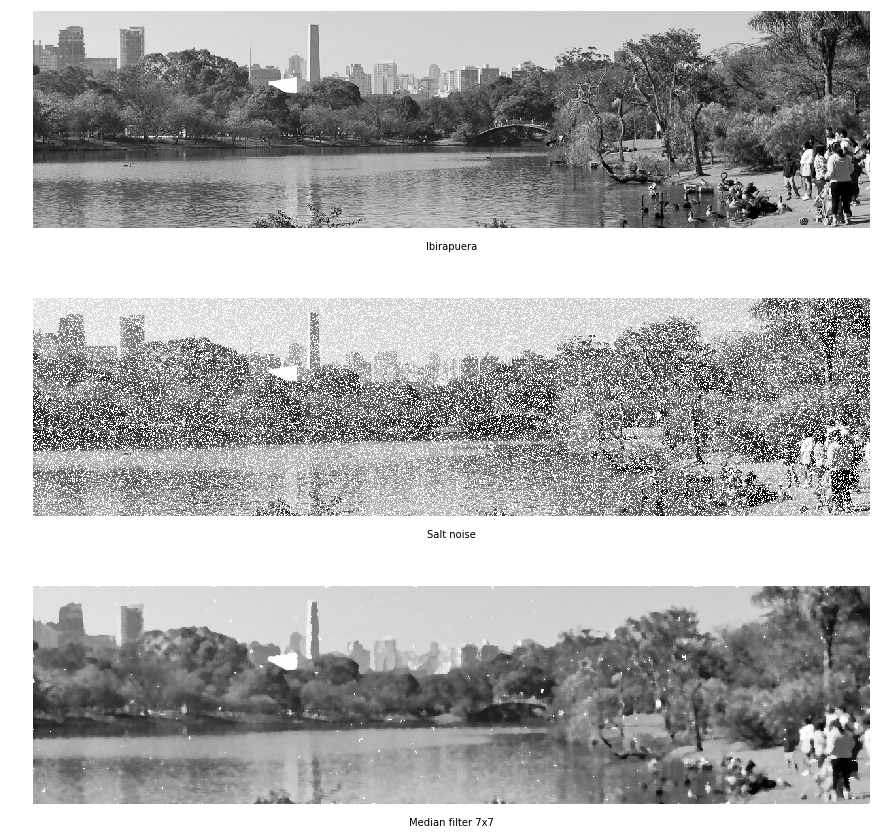

In [25]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
ax1.imshow(ibirapuera, cmap='gray')
ax2 = plt.subplot(312)
ax2.imshow(ruidoSal, cmap='gray')
ax3 = plt.subplot(313)
ax3.imshow(median7, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Salt noise", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Median filter 7x7", ha="center", transform=ax3.transAxes)

### Salt and pepper noise

In [26]:
blur3 = cv2.blur(ruidoSalPimenta, (3,3))
blur5 = cv2.blur(ruidoSalPimenta, (5,5))
blur7 = cv2.blur(ruidoSalPimenta, (7,7))
blur9 = cv2.blur(ruidoSalPimenta, (9,9))

geometric3 = geometric(ruidoSalPimenta, 3,3)
geometric5 = geometric(ruidoSalPimenta, 5,5)
geometric7 = geometric(ruidoSalPimenta, 7,7)
geometric9 = geometric(ruidoSalPimenta, 9,9)

harmonic3 = harmonic(ruidoSalPimenta, 3,3)
harmonic5 = harmonic(ruidoSalPimenta, 5,5)
harmonic7 = harmonic(ruidoSalPimenta, 7,7)
harmonic9 = harmonic(ruidoSalPimenta, 9,9)

contraharmonic33 = contraharmonic(ruidoSalPimenta, 3,3,3)
contraharmonic35 = contraharmonic(ruidoSalPimenta, 3,3,5)
contraharmonic37 = contraharmonic(ruidoSalPimenta, 3,3,7)
contraharmonic53 = contraharmonic(ruidoSalPimenta, 5,5,3)
contraharmonic55 = contraharmonic(ruidoSalPimenta, 5,5,5)
contraharmonic57 = contraharmonic(ruidoSalPimenta, 5,5,7)
contraharmonic73 = contraharmonic(ruidoSalPimenta, 7,7,3)
contraharmonic75 = contraharmonic(ruidoSalPimenta, 7,7,5)
contraharmonic77 = contraharmonic(ruidoSalPimenta, 7,7,7)
contraharmonic93 = contraharmonic(ruidoSalPimenta, 9,9,3)
contraharmonic95 = contraharmonic(ruidoSalPimenta, 9,9,5)
contraharmonic97 = contraharmonic(ruidoSalPimenta, 9,9,7)

median3 = cv2.medianBlur(ruidoSalPimenta, 3)
median5 = cv2.medianBlur(ruidoSalPimenta, 5)
median7 = cv2.medianBlur(ruidoSalPimenta, 7)
median9 = cv2.medianBlur(ruidoSalPimenta, 9)

max3 = max_filter(ruidoSalPimenta, 3,3)
max5 = max_filter(ruidoSalPimenta, 5,5)
max7 = max_filter(ruidoSalPimenta, 7,7)
max9 = max_filter(ruidoSalPimenta, 9,9)

min3 = min_filter(ruidoSalPimenta, 3,3)
min5 = min_filter(ruidoSalPimenta, 5,5)
min7 = min_filter(ruidoSalPimenta, 7,7)
min9 = min_filter(ruidoSalPimenta, 9,9)

mid_point3 = mid_point(ruidoSalPimenta, 3,3)
mid_point5 = mid_point(ruidoSalPimenta, 5,5)
mid_point7 = mid_point(ruidoSalPimenta, 7,7)
mid_point9 = mid_point(ruidoSalPimenta, 9,9)

alpha_cut31 = alpha_cut(ruidoSalPimenta, 3,3,1)
alpha_cut32 = alpha_cut(ruidoSalPimenta, 3,3,2)
alpha_cut33 = alpha_cut(ruidoSalPimenta, 3,3,3)
alpha_cut51 = alpha_cut(ruidoSalPimenta, 5,5,1)
alpha_cut52 = alpha_cut(ruidoSalPimenta, 5,5,2)
alpha_cut53 = alpha_cut(ruidoSalPimenta, 5,5,3)
alpha_cut71 = alpha_cut(ruidoSalPimenta, 7,7,1)
alpha_cut72 = alpha_cut(ruidoSalPimenta, 7,7,2)
alpha_cut73 = alpha_cut(ruidoSalPimenta, 7,7,3)
alpha_cut91 = alpha_cut(ruidoSalPimenta, 9,9,1)
alpha_cut92 = alpha_cut(ruidoSalPimenta, 9,9,2)
alpha_cut93 = alpha_cut(ruidoSalPimenta, 9,9,3)

In [27]:
print("blur3:", rmse(blur3, ibirapuera))
print("blur5:", rmse(blur5, ibirapuera))
print("blur7:", rmse(blur7, ibirapuera))
print("blur9:", rmse(blur9, ibirapuera))
print("geometric3:", rmse(geometric3, ibirapuera))
print("geometric5:", rmse(geometric5, ibirapuera))
print("geometric7:", rmse(geometric7, ibirapuera))
print("geometric9:", rmse(geometric9, ibirapuera))
print("harmonic3:", rmse(harmonic3, ibirapuera))
print("harmonic5:", rmse(harmonic5, ibirapuera))
print("harmonic7:", rmse(harmonic7, ibirapuera))
print("harmonic9:", rmse(harmonic9, ibirapuera))
print("contraharmonic33:", rmse(contraharmonic33, ibirapuera))
print("contraharmonic35:", rmse(contraharmonic35, ibirapuera))
print("contraharmonic37:", rmse(contraharmonic37, ibirapuera))
print("contraharmonic53:", rmse(contraharmonic53, ibirapuera))
print("contraharmonic55:", rmse(contraharmonic55, ibirapuera))
print("contraharmonic57:", rmse(contraharmonic57, ibirapuera))
print("contraharmonic73:", rmse(contraharmonic73, ibirapuera))
print("contraharmonic75:", rmse(contraharmonic75, ibirapuera))
print("contraharmonic77:", rmse(contraharmonic77, ibirapuera))
print("contraharmonic93:", rmse(contraharmonic93, ibirapuera))
print("contraharmonic95:", rmse(contraharmonic95, ibirapuera))
print("contraharmonic97:", rmse(contraharmonic97, ibirapuera))
print("median3:", rmse(median3, ibirapuera))
print("median5:", rmse(median5, ibirapuera))
print("median7:", rmse(median7, ibirapuera))
print("median9:", rmse(median9, ibirapuera))
print("max3:", rmse(max3, ibirapuera))
print("max5:", rmse(max5, ibirapuera))
print("max7:", rmse(max7, ibirapuera))
print("max9:", rmse(max9, ibirapuera))
print("min3:", rmse(min3, ibirapuera))
print("min5:", rmse(min5, ibirapuera))
print("min7:", rmse(min7, ibirapuera))
print("min9:", rmse(min9, ibirapuera))
print("mid_point3:", rmse(mid_point3, ibirapuera))
print("mid_point5:", rmse(mid_point5, ibirapuera))
print("mid_point7:", rmse(mid_point7, ibirapuera))
print("mid_point9:", rmse(mid_point9, ibirapuera))
print("alpha_cut31:", rmse(alpha_cut31, ibirapuera))
print("alpha_cut32:", rmse(alpha_cut32, ibirapuera))
print("alpha_cut33:", rmse(alpha_cut33, ibirapuera))
print("alpha_cut51:", rmse(alpha_cut51, ibirapuera))
print("alpha_cut52:", rmse(alpha_cut52, ibirapuera))
print("alpha_cut53:", rmse(alpha_cut53, ibirapuera))
print("alpha_cut71:", rmse(alpha_cut71, ibirapuera))
print("alpha_cut72:", rmse(alpha_cut72, ibirapuera))
print("alpha_cut73:", rmse(alpha_cut73, ibirapuera))
print("alpha_cut91:", rmse(alpha_cut91, ibirapuera))
print("alpha_cut92:", rmse(alpha_cut92, ibirapuera))
print("alpha_cut93:", rmse(alpha_cut93, ibirapuera))

blur3: 27.724246810417682
blur5: 25.532607506428466
blur7: 25.679711835293123
blur9: 26.29663177157923
geometric3: 66.01368426634485
geometric5: 79.44049923988382
geometric7: 116.90944972524701
geometric9: 138.39914360107872
harmonic3: 100.41569612582828
harmonic5: 112.03798838478876
harmonic7: 113.33748412924228
harmonic9: 125.31188257619382
contraharmonic33: 66.01368426634485
contraharmonic35: 66.01368426634485
contraharmonic37: 64.33053298180984
contraharmonic53: 73.94649237466079
contraharmonic55: 79.21842791320584
contraharmonic57: 92.82204146312114
contraharmonic73: 88.2391933127592
contraharmonic75: 100.29078189115184
contraharmonic77: 120.79260843889506
contraharmonic93: 95.41431264061845
contraharmonic95: 112.70643356752649
contraharmonic97: 134.29965139028118
median3: 17.701052888659394
median5: 19.67601618215182
median7: 21.274463594618283
median9: 22.57319176559856
max3: 66.01368426634485
max5: 83.26996202495914
max7: 109.16627331697926
max9: 125.59345305942061
min3: 66.013

### Best result (Median Filter 3x3)

Text(0.5, -0.1, 'Median filter 3x3')

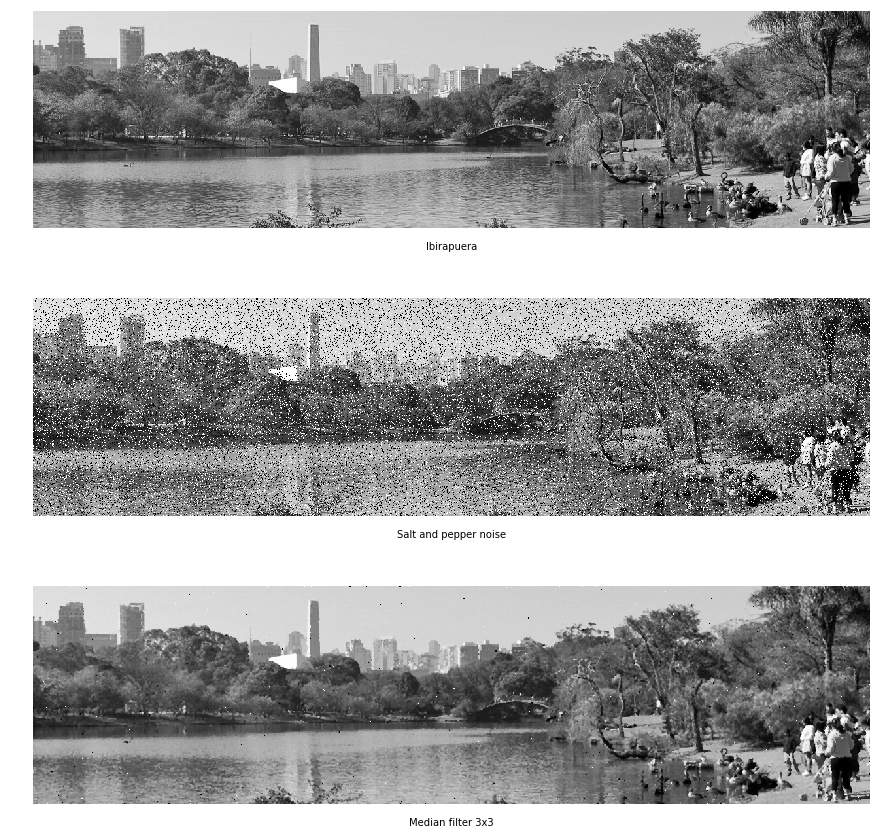

In [28]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(311)
ax1.imshow(ibirapuera, cmap='gray')
ax2 = plt.subplot(312)
ax2.imshow(ruidoSalPimenta, cmap='gray')
ax3 = plt.subplot(313)
ax3.imshow(median3, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Salt and pepper noise", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Median filter 3x3", ha="center", transform=ax3.transAxes)